# Spark: Dataframes y Spark SQL. Estadísticas básicas

Los dataframes se obtienen a partir de RDDs. 
Se pueden ver como RDDs de tipo *Row*

Un ejemplo está tomado de https://www.codementor.io/jadianes/python-spark-sql-dataframes-du107w74i

Muchos ejemplos de estadísticas y SparkSQL:

https://github.com/databricks/Spark-The-Definitive-Guide/blob/master/code/Structured_APIs-Chapter_7_Aggregations.py

In [1]:
import os
# cambiamos las variables del sistema
spark = 'C:\\hlocal\\tdm\\spark\\hadoop\\spark-2.3.2-bin-hadoop2.7'
# en el path se añade
path = os.environ.get('PATH') 
path = path+ ';'+spark+'\\bin;'
os.environ['PATH'] = path
os.environ['SPARK_HOME']= spark 
os.environ['HADOOP_HOME']= spark 
os.environ['PYSPARK_DRIVER_PYTHON']= 'jupyter'
os.environ['PYSPARK_DRIVER_PYTHON_OPTS']='notebook'
# si da problema con collect quizás haya que poner java_home
#other = 'C:\\Program Files\\Java\jdk1,8.0_151'
#os.environ['JAVA_HOME']= 'C:\\JDK\\jdk8-64bits'
#os.environ['PATH'] = os.environ.get('JAVA_HOME')+'\\bin;'+path

import findspark
findspark.init()

import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext






In [2]:
import urllib
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
path = "c:\\hlocal\\tdm\\kddcup.gz"
f = urllib.request.urlretrieve(url,path )


raw_data = sc.textFile(path).cache() # Un RDD de strings
raw_data.take(5)

['0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.']

Ahora pasamos de RDD a Dataframe

In [4]:
from pyspark.sql import Row

csv_data = raw_data.map(lambda l: l.split(","))
row_data = csv_data.map(lambda p: Row(
    duration=int(p[0]), 
    protocol_type=p[1],
    service=p[2],
    flag=p[3],
    src_bytes=int(p[4]),
    dst_bytes=int(p[5]),
    wrong_fragment=int(p[7])
    )
)

# creamos el dataframe
interactions_df = spark.createDataFrame(row_data)
interactions_df.registerTempTable("interactions")

interactions_df.show()

+---------+--------+----+-------------+-------+---------+--------------+
|dst_bytes|duration|flag|protocol_type|service|src_bytes|wrong_fragment|
+---------+--------+----+-------------+-------+---------+--------------+
|     5450|       0|  SF|          tcp|   http|      181|             0|
|      486|       0|  SF|          tcp|   http|      239|             0|
|     1337|       0|  SF|          tcp|   http|      235|             0|
|     1337|       0|  SF|          tcp|   http|      219|             0|
|     2032|       0|  SF|          tcp|   http|      217|             0|
|     2032|       0|  SF|          tcp|   http|      217|             0|
|     1940|       0|  SF|          tcp|   http|      212|             0|
|     4087|       0|  SF|          tcp|   http|      159|             0|
|      151|       0|  SF|          tcp|   http|      210|             0|
|      786|       0|  SF|          tcp|   http|      212|             0|
|      624|       0|  SF|          tcp|   http|    

In [3]:
# Si el fichero tiene cabecera la cosa es mucho más fácil:
# Load  data
datos = spark.read.format("com.databricks.spark.csv")\
            .options(header='true', inferschema='true') \
            .load('c:\\hlocal\\tdm\\escalado.csv')


### Estadísticas descripticas

Comenzamos por ver datos básicos, como la media, desviación típica y valores máximos y mínimos

In [9]:
datos.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
community,806,0.31017369727047145,0.46285178084783823,0,1
num_conv,806,0.0496950581414392,0.09857844484103014,0.0,1.0
altura_media_ramas,806,0.18057369554838745,0.156900083964312,0.0,1.0
long_media_mensajes,806,0.029497639565756913,0.04703633613084475,0.0,1.0
num_conv_likes_com,806,0.5493165033287835,0.34903725950657777,0.0,1.0
num_conv_likes_otras,806,0.027979785642679895,0.12300045775692753,0.0,1.0
num_likes_com,806,0.0584554688523575,0.12000587239909087,0.0,1.354316547
num_likes_otra,806,0.0010860274379652592,0.004573456300625299,0.0,0.096
conv_insultos,806,0.052498151791563294,0.15289475311508768,0.0,1.0


In [10]:
interactions_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
dst_bytes,494021,868.5324247349809,33040.00125210252,0,5155468
duration,494021,47.97930249928647,707.7464723053699,0,58329
flag,494021,None,None,OTH,SH
protocol_type,494021,None,None,icmp,udp
service,494021,None,None,IRC,whois
src_bytes,494021,3025.6102959185946,988218.1010504081,0,693375640
wrong_fragment,494021,0.0064329249161472896,0.13480524800509122,0,3


Los histogramas pueden ayudar a entender mejor los datos. Se hacen para cada variable por separado

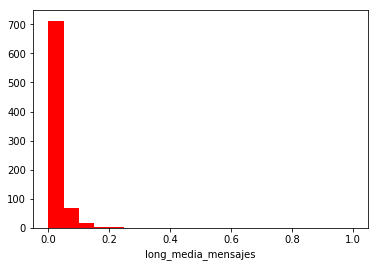

In [72]:
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
col = 'long_media_mensajes'
hist(ax, datos.select([col]), bins = 20, color=['red'])
plt.xlabel(col)
plt.show()

En ocasiones se entiende mejor si se aplica alguna función. En este caso tiene un tipo exponencial, 
así que parece que un logaritmo nos puede ayudar a entender mejor el dato

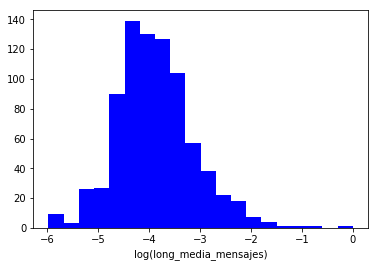

In [73]:
import math

# devuelve un valor tipo Row con el logaritmo del valor
def applyLog(x):
    if x[0]==0:
        v=0
    else:
        v=math.log(x[0])
    return Row(lx=v)



fig,ax = plt.subplots()
col = 'long_media_mensajes'
d = spark.createDataFrame(datos.select([col]).rdd.map(applyLog))
hist(ax, d, bins = 20, color=['blue'])
plt.xlabel('log('+col+')')
plt.show()

Parece una normal muy abultada. Para comprobarlo podemos acceder a dos parámetros tipicos, curtosis y asimetría:

https://support.minitab.com/es-mx/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/data-concepts/how-skewness-and-kurtosis-affect-your-distribution/


In [39]:
from pyspark.sql.functions import skewness, kurtosis
d.select(skewness("lx"), kurtosis("lx")).show()

+------------------+------------------+
|      skewness(lx)|      kurtosis(lx)|
+------------------+------------------+
|0.4640675144935896|1.5161333411382607|
+------------------+------------------+



Esto indica que tenemos asimetría positiva y leptocúrtica (apuntada). Para ver como son estos valores para una distribución normal:

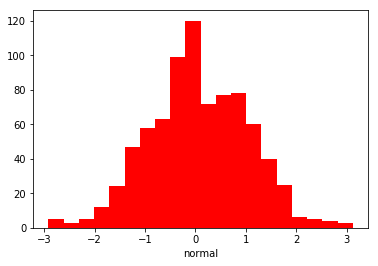

+--------------------+--------------------+
|    skewness(normal)|    kurtosis(normal)|
+--------------------+--------------------+
|0.004527794849760889|-0.02049550299366...|
+--------------------+--------------------+



In [62]:
from pyspark.sql.functions import rand, randn

d2 = d.select(randn(seed=23).alias("normal"))

fig,ax = plt.subplots()
col = 'normal'
hist(ax, d2.select([col]), bins = 20, color=['red'])
plt.xlabel(col)
plt.show()

d2.select(skewness("normal"), kurtosis("normal")).show()

In [52]:
from pyspark.sql.functions import corr
datos.select(corr("num_likes_com", "conv_insultos")).show()

+----------------------------------+
|corr(num_likes_com, conv_insultos)|
+----------------------------------+
|              -0.01645181141067...|
+----------------------------------+



In [61]:
for i in range(len(datos.columns)):
    for j in range(len(datos.columns)):
        c = datos.select(corr(datos.columns[i], datos.columns[j])).first()
        if math.fabs(c[0])>0.65 and i<j:
            print(c)

Row(corr(num_conv, num_likes_com)=0.9314729766211521)
Row(corr(num_conv, cont_conv_iniciadas)=0.900969418725643)
Row(corr(num_conv, usuarios_otra_interacciona)=0.734191208690115)
Row(corr(num_likes_com, cont_conv_iniciadas)=0.8734680477834502)
Row(corr(long_media_debates_com, long_media_debates_otra)=0.6542221455837354)


### Muestras

Nos interesa representar gráficamente la relación entre *long_media_debates_com* y *long_media_debates_otra*. Sin embargo, en un entorno big data no tiene sentido mostrar todos los puntos. En lugar de eso tomamos una muestra aleatoria. Para ello usaremos *sample*, que recibe tres parámetros:


    * withReplacement = True o False según se desee una muestra con o sin reemplazamiento.
    * fraction, valor entre 0 y uno con la proporción de la población a seleccionar. 
    * seed : semilla aleatorio si se quiere que el resultado sea reproducible 



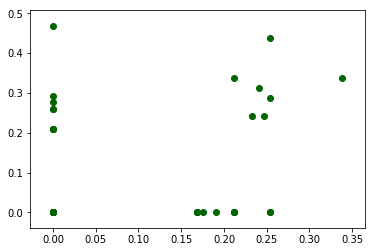

In [91]:
n = datos.count()
campos = ['long_media_debates_com','long_media_debates_otra']
d = datos.select(campos).sort(campos[0])
puntos = 100 # cuántos puntos deseamos
if n<puntos:
    p = 1 # seleccionar todos
else:
    p = puntos / n
puntos = d.sample(False,p).collect()

# mostrar
plt.scatter(list(map(lambda x:x[0],puntos)),list(map(lambda x:x[1],puntos)), color='darkgreen', label=campos[0])
#plt.scatter(list(map(lambda x:x[1],puntos)), color='darkred', label=campos[1])
plt.show()


Los valores 0 "molestan". ¿Podriamos quitarlos? ¿Antes o después del *sample*?